![UCI](http://mlr.cs.umass.edu/ml/assets/logo.gif)

# Loading in the Data
In this example, we are going to use crossed columns and embedding columns inside of a tensorflow object created with the contrib "learn" library.

However, we will start the process by loading up a dataset with a mix of categorical data and numeric data. This dataset is quite old and has been used many times in machine learning examples: the census data from 1990's. We will use it to predict if a person will earn over or under 50k per year.

- https://archive.ics.uci.edu/ml/datasets/Census-Income+(KDD)

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
headers = ['age','workclass','fnlwgt','education','edu_num','marital_status',
           'occupation','relationship','race','sex','cap_gain','cap_loss','work_hrs_weekly','country','income']
df_train_orig = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',names=headers)
df_test_orig = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',names=headers)
# df_test_orig = df_test_orig.iloc[1:]
print(df_train_orig.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
workclass          32561 non-null object
fnlwgt             32561 non-null int64
education          32561 non-null object
edu_num            32561 non-null int64
marital_status     32561 non-null object
occupation         32561 non-null object
relationship       32561 non-null object
race               32561 non-null object
sex                32561 non-null object
cap_gain           32561 non-null int64
cap_loss           32561 non-null int64
work_hrs_weekly    32561 non-null int64
country            32561 non-null object
income             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [6]:
df_train_orig.to_csv(r'C:\Users\jli\Documents\JLI\Code & Examples\MachineLearningNotebooks-master\MachineLearningNotebooks-master\adult_income_train.csv')

df_test_orig.to_csv(r'C:\Users\jli\Documents\JLI\Code & Examples\MachineLearningNotebooks-master\MachineLearningNotebooks-master\adult_income_test.csv')

In [27]:
print(df_train_orig.shape)
print(df_test_orig.shape)

(32561, 15)
(16282, 15)


In [30]:
df_train_orig.head(100)

age          workclass  fnlwgt      education  edu_num  \
0    39          State-gov   77516      Bachelors       13   
1    50   Self-emp-not-inc   83311      Bachelors       13   
2    38            Private  215646        HS-grad        9   
3    53            Private  234721           11th        7   
4    28            Private  338409      Bachelors       13   
5    37            Private  284582        Masters       14   
6    49            Private  160187            9th        5   
7    52   Self-emp-not-inc  209642        HS-grad        9   
8    31            Private   45781        Masters       14   
9    42            Private  159449      Bachelors       13   
10   37            Private  280464   Some-college       10   
11   30          State-gov  141297      Bachelors       13   
12   23            Private  122272      Bachelors       13   
13   32            Private  205019     Assoc-acdm       12   
14   40            Private  121772      Assoc-voc       11   
15   34            Private  245487        7th-8th        4   
16   25   Self-emp-not-inc  176756        HS-grad        9   
17   32            Private  186824        HS-grad        9   
18   38            Private   28887           11th        7   
19   43   Self-emp-not-inc  292175        Masters       14   
20   40            Private  193524      Doctorate       16   
21   54            Private  302146        HS-grad        9   
22   35        Federal-gov   76845            9th        5   
23   43            Private  117037           11th        7   
24   59            Private  109015        HS-grad        9   
25   56          Local-gov  216851      Bachelors       13   
26   19            Private  168294        HS-grad        9   
27   54                  ?  180211   Some-college       10   
28   39            Private  367260        HS-grad        9   
29   49            Private  193366        HS-grad        9   
30   23          Local-gov  190709     Assoc-acdm       12   
31   20            Private  266015   Some-college       10   
32   45            Private  386940      Bachelors       13   
33   30        Federal-gov   59951   Some-college       10   
34   22          State-gov  311512   Some-college       10   
35   48            Private  242406           11th        7   
36   21            Private  197200   Some-college       10   
37   19            Private  544091        HS-grad        9   
38   31            Private   84154   Some-college       10   
39   48   Self-emp-not-inc  265477     Assoc-acdm       12   
40   31            Private  507875            9th        5   
41   53   Self-emp-not-inc   88506      Bachelors       13   
42   24            Private  172987      Bachelors       13   
43   49            Private   94638        HS-grad        9   
44   25            Private  289980        HS-grad        9   
45   57        Federal-gov  337895      Bachelors       13   
46   53            Private  144361        HS-grad        9   
47   44            Private  128354        Masters       14   
48   41          State-gov  101603      Assoc-voc       11   
49   29            Private  271466      Assoc-voc       11   
50   25            Private   32275   Some-college       10   
51   18            Private  226956        HS-grad        9   
52   47            Private   51835    Prof-school       15   
53   50        Federal-gov  251585      Bachelors       13   
54   47       Self-emp-inc  109832        HS-grad        9   
55   43            Private  237993   Some-college       10   
56   46            Private  216666        5th-6th        3   
57   35            Private   56352      Assoc-voc       11   
58   41            Private  147372        HS-grad        9   
59   30            Private  188146        HS-grad        9   
60   30            Private   59496      Bachelors       13   
61   32                  ?  293936        7th-8th        4   
62   48            Private  149640        HS-grad        9   
63   42            Private  116632  

In [3]:
df_test_orig.head(5)

age   workclass    fnlwgt      education  edu_num  \
0  |1x3 Cross validator         NaN       NaN            NaN      NaN   
1                    25     Private  226802.0           11th      7.0   
2                    38     Private   89814.0        HS-grad      9.0   
3                    28   Local-gov  336951.0     Assoc-acdm     12.0   
4                    44     Private  160323.0   Some-college     10.0   

        marital_status          occupation relationship    race    sex  \
0                  NaN                 NaN          NaN     NaN    NaN   
1        Never-married   Machine-op-inspct    Own-child   Black   Male   
2   Married-civ-spouse     Farming-fishing      Husband   White   Male   
3   Married-civ-spouse     Protective-serv      Husband   White   Male   
4   Married-civ-spouse   Machine-op-inspct      Husband   Black   Male   

   cap_gain  cap_loss  work_hrs_weekly         country   income  
0       NaN       NaN              NaN             NaN      NaN  
1       0.0       0.0             40.0   United-States   <=50K.  
2       0.0       0.0             50.0   United-States   <=50K.  
3       0.0       0.0             40.0   United-States    >50K.  
4    7688.0       0.0             40.0   United-States    >50K.

In [15]:
df_test_orig = df_test_orig.iloc[1:]
df_test_orig.head(5)

age   workclass    fnlwgt      education  edu_num       marital_status  \
1  25     Private  226802.0           11th      7.0        Never-married   
2  38     Private   89814.0        HS-grad      9.0   Married-civ-spouse   
3  28   Local-gov  336951.0     Assoc-acdm     12.0   Married-civ-spouse   
4  44     Private  160323.0   Some-college     10.0   Married-civ-spouse   
5  18           ?  103497.0   Some-college     10.0        Never-married   

           occupation relationship    race      sex  cap_gain  cap_loss  \
1   Machine-op-inspct    Own-child   Black     Male       0.0       0.0   
2     Farming-fishing      Husband   White     Male       0.0       0.0   
3     Protective-serv      Husband   White     Male       0.0       0.0   
4   Machine-op-inspct      Husband   Black     Male    7688.0       0.0   
5                   ?    Own-child   White   Female       0.0       0.0   

   work_hrs_weekly         country   income  
1             40.0   United-States   <=50K.  
2             50.0   United-States   <=50K.  
3             40.0   United-States    >50K.  
4             40.0   United-States    >50K.  
5             30.0   United-States   <=50K.

In [19]:
# In case of deep copy, a copy of object is copied in other object. It means that any changes made to a copy of object do not reflect in the original object.

from copy import deepcopy
df_train = deepcopy(df_train_orig)
df_test = deepcopy(df_test_orig)

The data is organized as follows: 

|Variable | description|
|----|--------|
|age: | continuous|
|workclass:      |Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, ...|
|fnlwgt:         |continuous.|
|education:      |Bachelors, Some-college, 11th, HS-grad, Prof-school, ...|
|education-num:  |continuous.|
|marital-status: |Married-civ-spouse, Divorced, Never-married, Separated, Widowed, ... |
|occupation:     |Tech-support, Craft-repair, Other-service, ...|
|relationship:   | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.|
|race:           |White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.|
|sex:            |Female, Male.|
|capital-gain:   |continuous.|
|capital-loss:   |continuous.|
|hours-per-week: |continuous.|
|native-country: |United-States, Cambodia, England, ... |
|**income (target):**|<50k, >=50k| 

In [20]:
# there are no nulls in train/test because they appeared as '?'
df_train.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
edu_num            0
marital_status     0
occupation         0
relationship       0
race               0
sex                0
cap_gain           0
cap_loss           0
work_hrs_weekly    0
country            0
income             0
dtype: int64

In [21]:
df_test.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
edu_num            0
marital_status     0
occupation         0
relationship       0
race               0
sex                0
cap_gain           0
cap_loss           0
work_hrs_weekly    0
country            0
income             0
dtype: int64

In [22]:
print(df_train.shape)
print(df_test.shape)

(32561, 15)
(16281, 15)


In [31]:

import numpy as np

# let's just get rid of rows with any missing data
# and then reset the indices of the dataframe so it corresponds to row number
df_train.replace(to_replace=' ?',value=np.nan, inplace=True)
print(df_train.isnull().sum())
df_train.dropna(inplace=True)
df_train.reset_index()

df_test.replace(to_replace=' ?',value=np.nan, inplace=True)
print(df_test.isnull().sum())
df_test.dropna(inplace=True)
df_test.reset_index()
print(df_test.shape)

df_test.head()

age                   0
workclass          1836
fnlwgt                0
education             0
edu_num               0
marital_status        0
occupation         1843
relationship          0
race                  0
sex                   0
cap_gain              0
cap_loss              0
work_hrs_weekly       0
country             583
income                0
dtype: int64
age                  0
workclass          963
fnlwgt               0
education            0
edu_num              0
marital_status       0
occupation         966
relationship         0
race                 0
sex                  0
cap_gain             0
cap_loss             0
work_hrs_weekly      0
country            274
income               0
dtype: int64
(15060, 15)


age   workclass    fnlwgt      education  edu_num       marital_status  \
1  25     Private  226802.0           11th      7.0        Never-married   
2  38     Private   89814.0        HS-grad      9.0   Married-civ-spouse   
3  28   Local-gov  336951.0     Assoc-acdm     12.0   Married-civ-spouse   
4  44     Private  160323.0   Some-college     10.0   Married-civ-spouse   
6  34     Private  198693.0           10th      6.0        Never-married   

           occupation    relationship    race    sex  cap_gain  cap_loss  \
1   Machine-op-inspct       Own-child   Black   Male       0.0       0.0   
2     Farming-fishing         Husband   White   Male       0.0       0.0   
3     Protective-serv         Husband   White   Male       0.0       0.0   
4   Machine-op-inspct         Husband   Black   Male    7688.0       0.0   
6       Other-service   Not-in-family   White   Male       0.0       0.0   

   work_hrs_weekly         country   income  
1             40.0   United-States   <=50K.  
2             50.0   United-States   <=50K.  
3             40.0   United-States    >50K.  
4             40.0   United-States    >50K.  
6             30.0   United-States   <=50K.

## Processing
For preprocessing, we are going to fix a few issues in the dataset. 

- This first includes the use of "50K." instead of "50K" in the test set. 
- Next, we will encode the categorical features as integers (later on we will encode one hot)
- Finally, we will make certain all the continuous data is scaled properly

In [37]:
cat_features = [i for i in df_train.columns if df_train[i].dtype=='object']
numeric_features = [i for i in df_train.columns if i not in cat_features]
print(cat_features)
print(numeric_features)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'country', 'income']
['age', 'fnlwgt', 'edu_num', 'cap_gain', 'cap_loss', 'work_hrs_weekly']


In [38]:
# these two features completely overlap with each other
# you can remove 'education' from the cat_features
pd.crosstab(df_train['education'], df_train['edu_num'])

edu_num        1    2    3    4    5    6     7    8     9     10    11    12  \
education                                                                       
 10th           0    0    0    0    0  820     0    0     0     0     0     0   
 11th           0    0    0    0    0    0  1048    0     0     0     0     0   
 12th           0    0    0    0    0    0     0  377     0     0     0     0   
 1st-4th        0  151    0    0    0    0     0    0     0     0     0     0   
 5th-6th        0    0  288    0    0    0     0    0     0     0     0     0   
 7th-8th        0    0    0  557    0    0     0    0     0     0     0     0   
 9th            0    0    0    0  455    0     0    0     0     0     0     0   
 Assoc-acdm     0    0    0    0    0    0     0    0     0     0     0  1008   
 Assoc-voc      0    0    0    0    0    0     0    0     0     0  1307     0   
 Bachelors      0    0    0    0    0    0     0    0     0     0     0     0   
 Doctorate      0    0    0    0    0    0     0    0     0     0     0     0   
 HS-grad        0    0    0    0    0    0     0    0  9840     0     0     0   
 Masters        0    0    0    0    0    0     0    0     0     0     0     0   
 Preschool     45    0    0    0    0    0     0    0     0     0     0     0   
 Prof-school    0    0    0    0    0    0     0    0     0     0     0     0   
 Some-college   0    0    0    0    0    0     0    0     0  6678     0     0   

edu_num          13    14   15   16  
education                            
 10th             0     0    0    0  
 11th             0     0    0    0  
 12th             0     0    0    0  
 1st-4th          0     0    0    0  
 5th-6th          0     0    0    0  
 7th-8th          0     0    0    0  
 9th              0     0    0    0  
 Assoc-acdm       0     0    0    0  
 Assoc-voc        0     0    0    0  
 Bachelors     5044     0    0    0  
 Doctorate        0     0    0  375  
 HS-grad          0     0    0    0  
 Masters          0  1627    0    0  
 Preschool        0     0    0    0  
 Prof-school      0     0  542    0  
 Some-college     0     0    0    0

In [39]:
print(len(cat_features))
cat_features.remove('education')
print(len(cat_features))

9
8


In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# replace strings
if df_test.income.dtype=='object':
    df_test.income.replace(to_replace=[' <=50K.',' >50K.'],value=['<=50K','>50K'],inplace=True)
    print(df_test.income.value_counts())

# define objects that can encode each variable as integer    
encoders = dict() 
categorical_headers = ['workclass','education','marital_status',
                       'occupation','relationship','race','sex','country']

# train all encoders (special case the target 'income')
# the following code removes blanks from the cat features 
# apply label encoder to transform (from categorical to numeric)
for col in categorical_headers+['income']:
    df_train[col] = df_train[col].str.strip()
    df_test[col] = df_test[col].str.strip()
    
    if col=="income":
        tmp = LabelEncoder()
        df_train[col] = tmp.fit_transform(df_train[col])
        df_test[col] = tmp.transform(df_test[col])
    else:
        # integer encoded variables
        encoders[col] = LabelEncoder() # save the encoder
        df_train[col+'_int'] = encoders[col].fit_transform(df_train[col])
        df_test[col+'_int'] = encoders[col].transform(df_test[col])

# scale the numeric, continuous variables
numeric_headers = ["age", "cap_gain", "cap_loss","work_hrs_weekly"]

for col in numeric_headers:
    df_train[col] = df_train[col].astype(np.float)
    df_test[col] = df_test[col].astype(np.float)
    
    ss = StandardScaler()
    df_train[col] = ss.fit_transform(df_train[col].values.reshape(-1, 1))
    df_test[col] = ss.transform(df_test[col].values.reshape(-1, 1))
    
df_test.head()

<=50K    11360
>50K      3700
Name: income, dtype: int64


age  workclass    fnlwgt     education  edu_num      marital_status  \
1 -1.023104    Private  226802.0          11th      7.0       Never-married   
2 -0.033340    Private   89814.0       HS-grad      9.0  Married-civ-spouse   
3 -0.794697  Local-gov  336951.0    Assoc-acdm     12.0  Married-civ-spouse   
4  0.423474    Private  160323.0  Some-college     10.0  Married-civ-spouse   
6 -0.337883    Private  198693.0          10th      6.0       Never-married   

          occupation   relationship   race   sex  cap_gain  cap_loss  \
1  Machine-op-inspct      Own-child  Black  Male -0.147445 -0.218586   
2    Farming-fishing        Husband  White  Male -0.147445 -0.218586   
3    Protective-serv        Husband  White  Male -0.147445 -0.218586   
4  Machine-op-inspct        Husband  Black  Male  0.890601 -0.218586   
6      Other-service  Not-in-family  White  Male -0.147445 -0.218586   

   work_hrs_weekly        country  income  workclass_int  education_int  \
1        -0.077734  United-States       0              2              1   
2         0.757005  United-States       0              2             11   
3        -0.077734  United-States       1              1              7   
4        -0.077734  United-States       1              2             15   
6        -0.912474  United-States       0              2              0   

   marital_status_int  occupation_int  relationship_int  race_int  sex_int  \
1                   4               6                 3         2        1   
2                   2               4                 0         4        1   
3                   2              10                 0         4        1   
4                   2               6                 0         2        1   
6                   4               7                 1         4        1   

   country_int  
1           38  
2           38  
3           38  
4           38  
6           38

In [42]:
# let's start as simply as possible, without any feature preprocessing
categorical_headers_ints = [x+'_int' for x in categorical_headers]

# we will forego one-hot encoding right now and instead just scale all inputs
#   this is just to get an example running in Keras (don't ever do this)
feature_columns = categorical_headers_ints+numeric_headers
X_train =  ss.fit_transform(df_train[feature_columns].values).astype(np.float32)
X_test =  ss.transform(df_test[feature_columns].values).astype(np.float32)

y_train = df_train['income'].values.astype(np.int)
y_test = df_test['income'].values.astype(np.int)

print(feature_columns)

['workclass_int', 'education_int', 'marital_status_int', 'occupation_int', 'relationship_int', 'race_int', 'sex_int', 'country_int', 'age', 'cap_gain', 'cap_loss', 'work_hrs_weekly']


![keras](https://blog.keras.io/img/keras-tensorflow-logo.jpg)


# An example similar to Sklearn, Keras
- We will start with creating a model that is similar to what we have seen in scikit-learn. 
- Let's not worry about pre-processing the data right now. Let's just get familiar with Keras.

In [ ]:
from sklearn import metrics as mt
import keras

keras.__version__

In [ ]:
# from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.layers import Embedding, Flatten, Concatenate
from keras.models import Model

In [9]:
# combine the features into a single large matrix
X_train = df_train[feature_columns].values
X_test = df_test[feature_columns].values

# This returns a tensor
inputs = Input(shape=(X_train.shape[1],))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(units=10, activation='relu')(inputs)
x = Dense(units=5, activation='tanh')(x)
predictions = Dense(1,activation='sigmoid')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

___
## Adding more customization
For this particular optimization, we could go beyond SGD and use a different optimizer. There are many excellent explanations of different optimizers, for instance:
- http://sebastianruder.com/optimizing-gradient-descent/

Now that we have defined the model, its as simple as using it in a very familiar syntax:

In [10]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [12]:
%%time

model.fit(X_train, y_train, epochs=10, batch_size=50, verbose=0)

from sklearn import metrics as mt
yhat_proba = model.predict(X_test)
yhat = np.round(yhat_proba)
print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))

Epoch 1/10
30162/30162 [==============================] - 1s 34us/step - loss: 0.1506 - acc: 0.7822
Epoch 2/10
30162/30162 [==============================] - 1s 32us/step - loss: 0.1492 - acc: 0.7841
Epoch 3/10
30162/30162 [==============================] - 1s 30us/step - loss: 0.1489 - acc: 0.7819
Epoch 4/10
30162/30162 [==============================] - 1s 36us/step - loss: 0.1485 - acc: 0.7855
Epoch 5/10
30162/30162 [==============================] - 1s 38us/step - loss: 0.1489 - acc: 0.7840
Epoch 6/10
30162/30162 [==============================] - 1s 38us/step - loss: 0.1471 - acc: 0.7838
Epoch 7/10
30162/30162 [==============================] - 1s 32us/step - loss: 0.1470 - acc: 0.7893
Epoch 8/10
30162/30162 [==============================] - 1s 37us/step - loss: 0.1476 - acc: 0.7828
Epoch 9/10
30162/30162 [==============================] - 1s 36us/step - loss: 0.1462 - acc: 0.7873
Epoch 10/10
30162/30162 [==============================] - 1s 43us/step - loss: 0.1456 - acc: 0.7878

Great! **But we are not handling categorical data properly here...** Let's fix that.

## One Hot Encoding Categorical Data
In order to add one-hot encoding, we need to convert the different columns into sparse arrays. To start, let's only create a model from the one hot encoded variables. 

In [13]:
# but we were dealing with the data incorrectly because we didn't one hot encode the 
#   categorical features
from sklearn.preprocessing import OneHotEncoder

# now let's encode the integer outputs as one hot encoded labels
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(df_train[categorical_headers_ints].values)
X_test_ohe = ohe.transform(df_test[categorical_headers_ints].values)

# the ohe instance will help us to organize our encoded matrix
print(ohe.feature_indices_)
print(X_train_ohe.shape)
print(type(X_train_ohe), '========THIS IS SPARSE ENCODED=======')

[ 0  7 23 30 44 50 55 57 98]
(30162, 98)
<class 'scipy.sparse.csr.csr_matrix'> ========THIS IS SPARSE ENCODED=======


In [14]:
# This returns a tensor
# the input can only be a scipy.sparse array
inputs = Input(shape=(X_train_ohe.shape[1],), sparse=True)

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(units=10, activation='relu')(inputs)
predictions = Dense(1,activation='sigmoid')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 98)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                990       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [15]:
%%time
model.fit(X_train_ohe,y_train, epochs=10, batch_size=50, verbose=0)

# test on the data
yhat = np.round(model.predict(X_test_ohe))
print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))

[[10547   813]
 [ 1883  1817]] 0.8209827357237716
CPU times: user 22.9 s, sys: 1.44 s, total: 24.3 s
Wall time: 15.7 s


## Multi-Modal Networks: Combine Branches, Sparse and Dense
The keras functional API allows us to setup different branches of inputs. When we call the `fit` function, we can tell keras the input to each branch using a simple list (you can also use a dictionary to be more explicit).

- Lets create two matrics: 
 - one with the one-hot encoded data, `X_train_ohe`
 - and another with the numeric data, `X_train_num`

In [16]:
# combine the features with two branches
from keras.layers import concatenate

# let's encode the integer outputs as one hot encoded labels
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(df_train[categorical_headers_ints].values)
X_test_ohe = ohe.transform(df_test[categorical_headers_ints].values)

# and save off the numeric features
X_train_num =  df_train[numeric_headers].values
X_test_num = df_test[numeric_headers].values

# create sparse input branch for ohe
inputsSparse = Input(shape=(X_train_ohe.shape[1],),sparse=True, name='X_ohe')
xSparse = Dense(units=10, activation='relu', name='ohe_1')(inputsSparse)

# create dense input branch for numeric
inputsDense = Input(shape=(X_train_num.shape[1],),sparse=False, name='X_Numeric')
xDense = Dense(units=10, activation='relu',name='num_1')(inputsDense)

x = concatenate([xSparse, xDense], name='concat')
predictions = Dense(1,activation='sigmoid', name='combined')(x)

# This creates a model that includes
# the Input layer and Dense layers
model = Model(inputs=[inputsSparse,inputsDense], outputs=predictions)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X_ohe (InputLayer)              (None, 98)           0                                            
__________________________________________________________________________________________________
X_Numeric (InputLayer)          (None, 4)            0                                            
__________________________________________________________________________________________________
ohe_1 (Dense)                   (None, 10)           990         X_ohe[0][0]                      
__________________________________________________________________________________________________
num_1 (Dense)                   (None, 10)           50          X_Numeric[0][0]                  
__________________________________________________________________________________________________
concat (Co

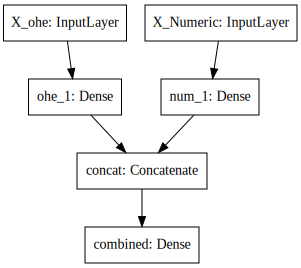

In [17]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# you will need to install pydot properly on your machine to get this running
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [18]:
%%time

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit([ X_train_ohe, X_train_num ], # inputs for each branch are a list
          y_train, 
          epochs=10, 
          batch_size=50, 
          verbose=0)

yhat = model.predict([X_test_ohe,
                      X_test_num]) # each branch has an input

yhat = np.round(yhat)
print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))

[[10558   802]
 [ 1797  1903]] 0.8274236387782204
CPU times: user 25.4 s, sys: 1.6 s, total: 27 s
Wall time: 16.2 s


So the confusion matrix is doing pretty well! But we still are just using an MLP with one hidden layer. We really want to take advantage of the embeddings and crossed columns that are possible with tensorflow. 


** [Back to Slides] **
___

# Crossed Columns and Deep Embeddings
Lets create the network below in steps. This network consists of a number of different paths for the input data to take.
![asdfasfd](https://www.tensorflow.org/images/wide_n_deep.svg)

## Step One: Using Dense embeddings 
First let's try a deeper architecture with dense embeddings for the categorical features, as described in lecture.

- The first decision to make is about the size of the dense feature embeddings. This is essentially a dimensionality reduction step. 
 - This can be difficult to set, but one common setting is $log_2(N)$ or $\sqrt{N}$ where $N$ is the total number of uniques values.
- When using an Embedding, we can leave the variables represented as integers. That is, keras will use the integer representation to figure out how to one-hot-encode the variable. This is great because it means we don't need to change the variable in memory. 

In [17]:
# we need to create separate sequential models for each embedding
embed_branches = []
X_ints_train = [] # keep track of inputs for each branch
X_ints_test = []# keep track of inputs for each branch
all_inputs = [] # this is what we will give to keras.Model inputs
all_branch_outputs = [] # this is where we will keep track of output of each branch

for col in categorical_headers_ints:
    # encode as ints for the embedding
    X_ints_train.append( df_train[col].values )
    X_ints_test.append( df_test[col].values )
    
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name=col)
    all_inputs.append( inputs ) # keep track of created inputs
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_branch_outputs.append(x)

# also get a dense branch of the numeric features
all_inputs.append(Input(shape=(X_train_num.shape[1],),sparse=False, name='numeric'))
x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
all_branch_outputs.append( Dense(units=10,activation='relu', name='numeric_2')(x) )

# merge the branches together
final_branch = concatenate(all_branch_outputs, name='concat_1')
final_branch = Dense(units=1,activation='sigmoid', name='combined')(final_branch)

model = Model(inputs=all_inputs, outputs=final_branch)


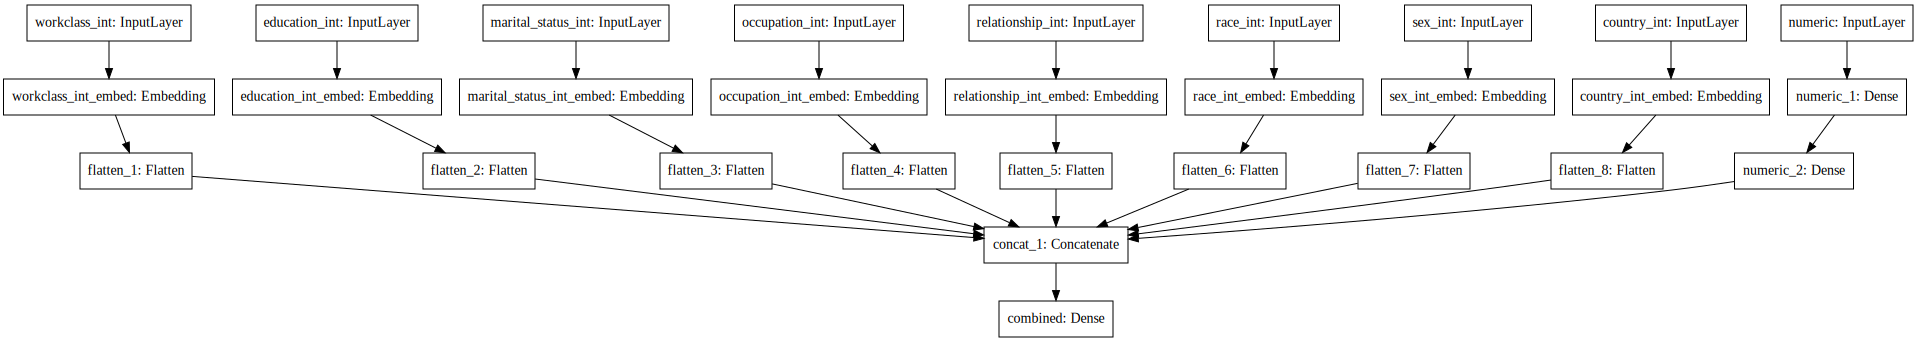

In [18]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [19]:
%%time

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(X_ints_train + [X_train_num], # create a list of inputs for embeddings
        y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
30162/30162 [==============================] - 3s 93us/step - loss: 0.1912 - acc: 0.7503
Epoch 2/10
30162/30162 [==============================] - 2s 83us/step - loss: 0.1608 - acc: 0.7663
Epoch 3/10
30162/30162 [==============================] - 2s 76us/step - loss: 0.1457 - acc: 0.7845
Epoch 4/10
30162/30162 [==============================] - 3s 84us/step - loss: 0.1358 - acc: 0.7976
Epoch 5/10
30162/30162 [==============================] - 2s 79us/step - loss: 0.1291 - acc: 0.8088
Epoch 6/10
30162/30162 [==============================] - 3s 86us/step - loss: 0.1246 - acc: 0.8162
Epoch 7/10
30162/30162 [==============================] - 2s 79us/step - loss: 0.1212 - acc: 0.8230
Epoch 8/10
30162/30162 [==============================] - 3s 83us/step - loss: 0.1186 - acc: 0.8287
Epoch 9/10
30162/30162 [==============================] - 3s 86us/step - loss: 0.1165 - acc: 0.8326
Epoch 10/10
30162/30162 [==============================] - 3s 86us/step - loss: 0.1149 - acc: 0.8360

In [20]:
yhat = np.round(model.predict(X_ints_test + [X_test_num]))
print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))

[[10713   647]
 [ 1820  1880]] 0.8361885790172643


That works fairly well using the embeddings. Now let's try to perform the same thing with crossed embeddings.


___


## Step Two: Making Crossed Columns
For this example, we are going to make embeddings for crossed columns. We will perform this step using `sklearn` 

Let's start simple with 
- just a single layer classifier 
- with branches of crossed categorical features as input 
 - one branch for each crossed column

In [21]:
# 'workclass','education','marital_status',
# 'occupation','relationship','race',
# 'sex','country'

cross_columns = [['education','occupation'],
                 ['sex', 'marital_status'],
                 ['workclass','occupation']]

# we will create separate sequential models for each embedding
embed_branches = []
X_ints_train = []
X_ints_test = []
all_inputs = []
all_branch_outputs = []

for cols in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed_train = df_train[cols].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = df_test[cols].apply(lambda x: '_'.join(x), axis=1)
    
    # 2. encode as integers
    enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
    X_crossed_train = enc.transform(X_crossed_train)
    X_crossed_test = enc.transform(X_crossed_test)
    
    # 3. save encodings in a list for each branch
    X_ints_train.append( X_crossed_train )
    X_ints_test.append( X_crossed_test )
    
    # get the number of categories in the crossing
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the crossed encoding
    inputs = Input(shape=(1,),dtype='int32',name='_'.join(cols))
    all_inputs.append(inputs) # save this as input for the keras.Model
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name='_'.join(cols)+'_embed')(inputs)
    x = Flatten()(x)
    all_branch_outputs.append(x) # save for concatenating later
    
# merge the branches together
final_branch = concatenate(all_branch_outputs)
# add a layer after merging
final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

model = Model(inputs=all_inputs, outputs=final_branch)

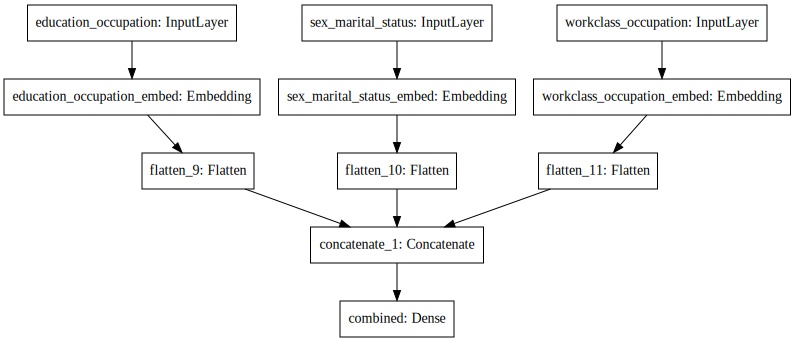

In [22]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [23]:
%%time

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(X_ints_train,
        y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
30162/30162 [==============================] - 2s 69us/step - loss: 0.2076 - acc: 0.7445
Epoch 2/10
30162/30162 [==============================] - 1s 49us/step - loss: 0.1806 - acc: 0.7511
Epoch 3/10
30162/30162 [==============================] - 1s 48us/step - loss: 0.1710 - acc: 0.7511
Epoch 4/10
30162/30162 [==============================] - 2s 54us/step - loss: 0.1623 - acc: 0.7511
Epoch 5/10
30162/30162 [==============================] - 1s 50us/step - loss: 0.1544 - acc: 0.7571
Epoch 6/10
30162/30162 [==============================] - 2s 50us/step - loss: 0.1486 - acc: 0.7775
Epoch 7/10
30162/30162 [==============================] - 2s 65us/step - loss: 0.1446 - acc: 0.7961
Epoch 8/10
30162/30162 [==============================] - 2s 59us/step - loss: 0.1417 - acc: 0.8011
Epoch 9/10
30162/30162 [==============================] - 2s 57us/step - loss: 0.1393 - acc: 0.8033
Epoch 10/10
30162/30162 [==============================] - 2s 51us/step - loss: 0.1374 - acc: 0.8056

In [24]:
yhat = np.round(model.predict(X_ints_test))
print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))

[[10827   533]
 [ 2322  1378]] 0.8104249667994687


Wow! That is just using crossed columns and a one layer Linear Classifer! So memorization works fairly well here.


___


## Step Three (Final): Combining Crossed Linear Classifier and Deep Embeddings
Now its just a matter of setting the wide and deep columns for tensorflow. After which, we can use the combined classifier!

Wide and deep models can have really interesting and useful properties so they are great to keep in mind when selecting an architecture. Some of the hyperparameters that are specific to this are:
- which features to cross together, typically you only want to cross columns you think are important to be connected--they somehow might create new knowledge by combining.
- the size of the dense feature embeddings. This can be difficult to set, but one common setting is $log_2(N)$ or $\sqrt{N}$ where $N$ is the total number of uniques values.

In [25]:
# 'workclass','education','marital_status',
# 'occupation','relationship','race',
# 'sex','country'

cross_columns = [['education','occupation'],
                 ['relationship','marital_status','sex'],
                 ['race','sex']]

#'workclass','education','marital_status','occupation','relationship','race','sex','country'

# we need to create separate lists for each branch
embed_branches = []
X_ints_train = []
X_ints_test = []
all_inputs = []
all_wide_branch_outputs = []

for cols in cross_columns:
    # encode crossed columns as ints for the embedding
    enc = LabelEncoder()
    
    # create crossed labels
    X_crossed_train = df_train[cols].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = df_test[cols].apply(lambda x: '_'.join(x), axis=1)
    
    enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
    X_crossed_train = enc.transform(X_crossed_train)
    X_crossed_test = enc.transform(X_crossed_test)
    X_ints_train.append( X_crossed_train )
    X_ints_test.append( X_crossed_test )
    
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
    all_inputs.append(inputs)
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name = '_'.join(cols)+'_embed')(inputs)
    x = Flatten()(x)
    all_wide_branch_outputs.append(x)
    
# merge the branches together
wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
wide_branch = Dense(units=1,activation='sigmoid',name='wide_combined')(wide_branch)

# reset this input branch
all_deep_branch_outputs = []
# add in the embeddings
for col in categorical_headers_ints:
    # encode as ints for the embedding
    X_ints_train.append( df_train[col].values )
    X_ints_test.append( df_test[col].values )
    
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name=col)
    all_inputs.append(inputs)
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_deep_branch_outputs.append(x)
    
# also get a dense branch of the numeric features
all_inputs.append(Input(shape=(X_train_num.shape[1],),
                        sparse=False,
                        name='numeric_data'))

x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
all_deep_branch_outputs.append( x )

# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

model = Model(inputs=all_inputs, outputs=final_branch)



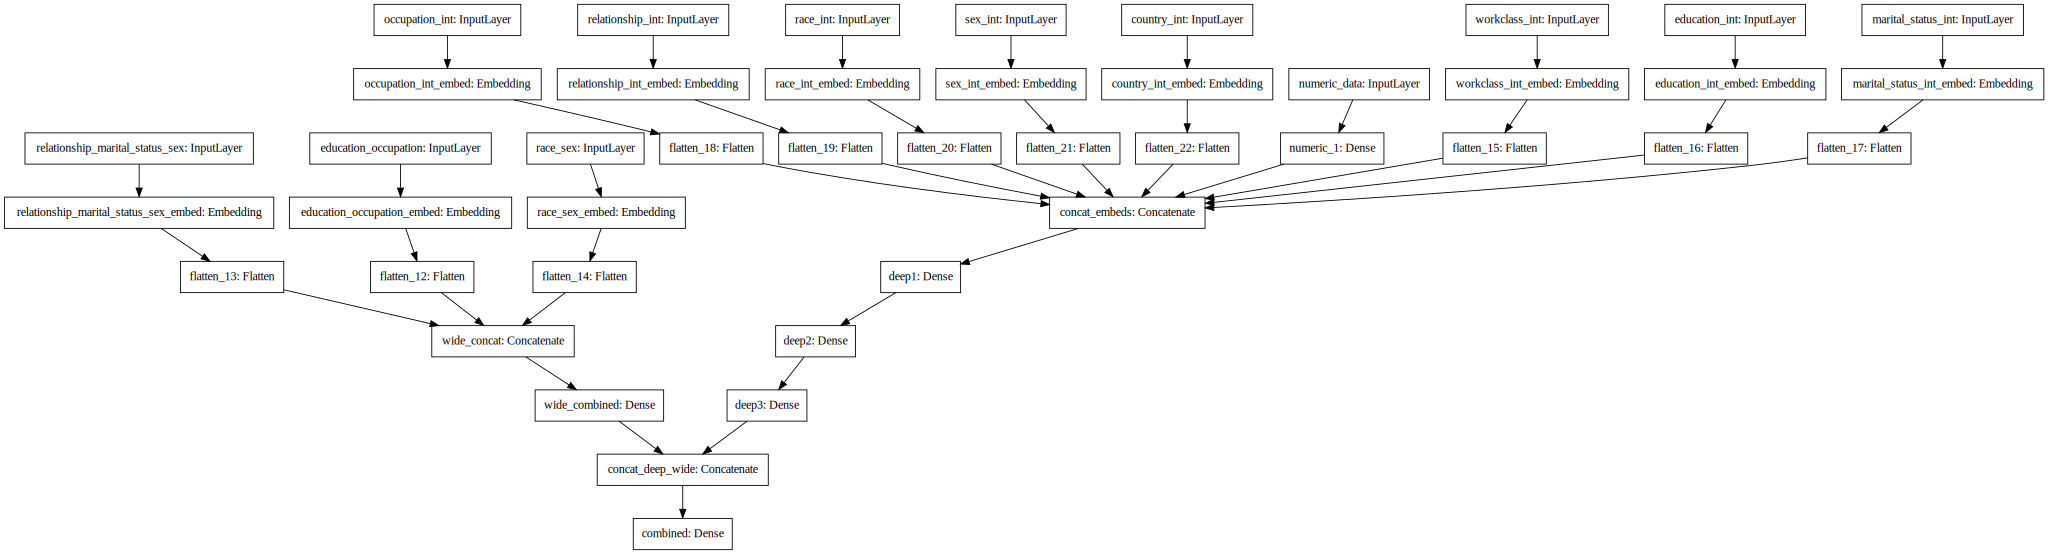

In [26]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# you will need to install pydot properly on your machine to get this running
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [27]:
%%time

model.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model.fit(X_ints_train+ [X_train_num],
                    y_train, 
                    epochs=10, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = (X_ints_test + [X_test_num], y_test))

Train on 30162 samples, validate on 15060 samples
Epoch 1/10
30162/30162 [==============================] - 7s 224us/step - loss: 0.1070 - acc: 0.8454 - val_loss: 0.1040 - val_acc: 0.8459
Epoch 2/10
30162/30162 [==============================] - 5s 177us/step - loss: 0.1014 - acc: 0.8523 - val_loss: 0.1021 - val_acc: 0.8537
Epoch 3/10
30162/30162 [==============================] - 5s 170us/step - loss: 0.1006 - acc: 0.8535 - val_loss: 0.1011 - val_acc: 0.8525
Epoch 4/10
30162/30162 [==============================] - 5s 171us/step - loss: 0.0999 - acc: 0.8551 - val_loss: 0.1011 - val_acc: 0.8527
Epoch 5/10
30162/30162 [==============================] - 5s 166us/step - loss: 0.0996 - acc: 0.8555 - val_loss: 0.1007 - val_acc: 0.8541
Epoch 6/10
30162/30162 [==============================] - 6s 187us/step - loss: 0.0993 - acc: 0.8563 - val_loss: 0.1008 - val_acc: 0.8533
Epoch 7/10
30162/30162 [==============================] - 6s 187us/step - loss: 0.0991 - acc: 0.8560 - val_loss: 0.1005 - 

In [28]:
yhat = np.round(model.predict(X_ints_test + [X_test_num]))
print(mt.confusion_matrix(y_test,yhat), mt.accuracy_score(y_test,yhat))

[[10691   669]
 [ 1515  2185]] 0.8549800796812749


Text(0.5,0,'epochs')

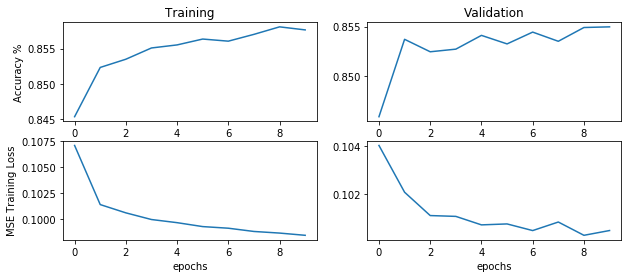

In [29]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['acc'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_acc'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('MSE Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

# Making Generalization Better
In what ways might we try to make the model found generalize more concretely?

**Self Test:** What is the best method to make the results better?  
- A. Add Dropout to deep network
- B. Add Dropout to wide network
- C. Perturb the Categorical Data during Training (augmentation)
- D. Add L2 regularization to different layer's weights